### DATA ACQUISITION

In [6]:
# Installing the required libraries
!pip install transformers
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.4
!pip install ffmpeg-python
!pip install speechrecognition

In [7]:
#  Importing the required libraries
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from google.colab import drive
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd
import glob 
from scipy.io import wavfile
from scipy.fftpack import fft
import scipy
import sys
import warnings
import IPython.display as ipd
from itertools import chain
import tqdm
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import itertools

from keras.models import model_from_json
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models, Model, optimizers
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from random import randint
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from matplotlib import pyplot
import seaborn as sns
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg
import soundfile as sf
import speech_recognition as sr
from tensorflow.keras.models import load_model

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Storing a list with the raw audio file paths got from The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)
path_1='/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/'+'Actor_'
path_full_1=[]
list_1=[]
for i in range(1,25):
  string=str(i)
  if(i<10):
    string='0'+str(i)
  path_full_1.append([path_1+string+'/'+j for j in os.listdir(path_1+string)])
  list_1.append(os.listdir(path_1+string))

# Optional dataset
# Storing a list with the raw audio file paths got from the Surrey Audio-Visual Expressed Emotion (SAVEE) Database
path_2='/content/drive/MyDrive/TherapyChatbot/SAVEE/AudioData/'
list_2=[]
path_full_2=[]
for i in ['DC','JE','JK','KL']:
  path_full_2.append([path_2+i+'/'+j for j in os.listdir(path_2+i)])
  list_2.append(os.listdir(path_2+i))

In [10]:
#printing the lists of audio files
print(list_1[:5])
print(list_2[:5])

[['03-01-04-02-02-01-01.wav', '03-01-04-01-01-01-01.wav', '03-01-05-02-02-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-05-02-01-02-01.wav', '03-01-01-01-01-02-01.wav', '03-01-03-02-01-02-01.wav', '03-01-06-01-01-01-01.wav', '03-01-05-02-01-01-01.wav', '03-01-03-02-02-01-01.wav', '03-01-05-02-02-01-01.wav', '03-01-01-01-02-01-01.wav', '03-01-06-01-01-02-01.wav', '03-01-04-02-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-01-01-01-01-01.wav', '03-01-04-02-02-02-01.wav', '03-01-02-02-01-01-01.wav', '03-01-04-01-02-02-01.wav', '03-01-04-01-01-02-01.wav', '03-01-04-02-01-02-01.wav', '03-01-04-01-02-01-01.wav', '03-01-02-01-01-02-01.wav', '03-01-05-01-01-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-02-01-02-02-01.wav', '03-01-03-02-01-01-01.wav', '03-01-05-01-02-01-01.wav', '03-01-02-02-01-02-01.wav', '03-01-03-01-01-01-01.wav', '03-01-06-01-02-02-01.wav', '03-01-05-01-02-02-01.wav', '03-01-03-01-02-02-01.wav', '03-01-02-02-02-02-01.wav', '03-01-06-01-02-01-01.wav', '03-01-05-01-01-01

### Exploratory Data Analysis

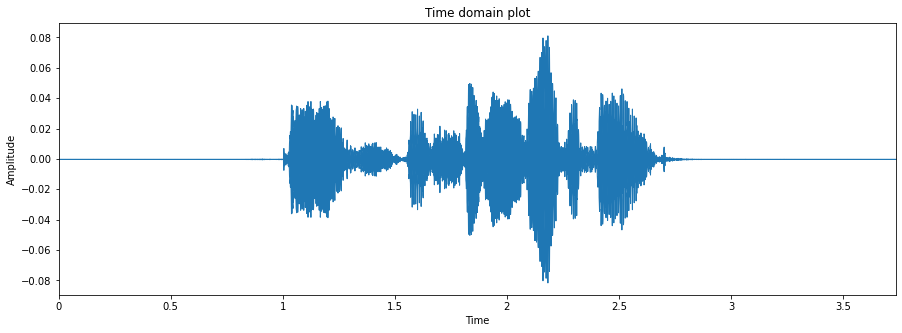

In [11]:
# Loading a calm audio wave to display
data,sampling_rate= librosa.load(path_1+"01/"+list_1[0][0])
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate);
plt.title("Time domain plot");
plt.ylabel("Amplitude");

In [12]:
# Having a listen to the calm and happy audio
print("Calm Audio")
ipd.Audio(path_1+"01/"+list_1[0][0])

Calm Audio


In [13]:
print("Happy Audio")
ipd.Audio(path_1+"01/"+list_1[0][3])

Happy Audio


Frequency sampling 22050
Channels 1
Complete Samplings N 82403
Secs 3.737097505668934
Timestep between samples Ts 4.5351473922902495e-05


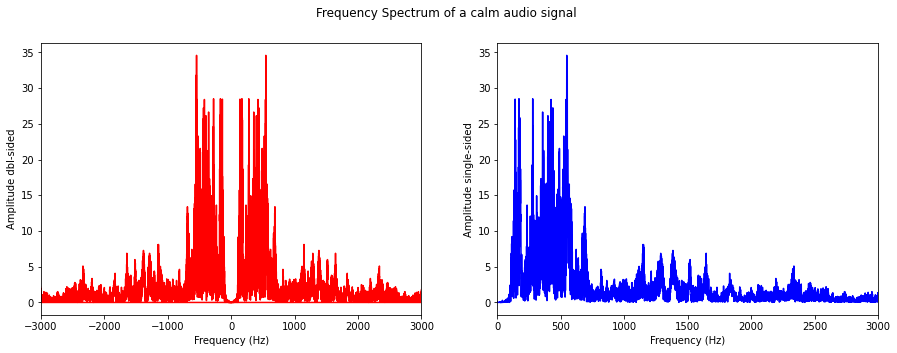

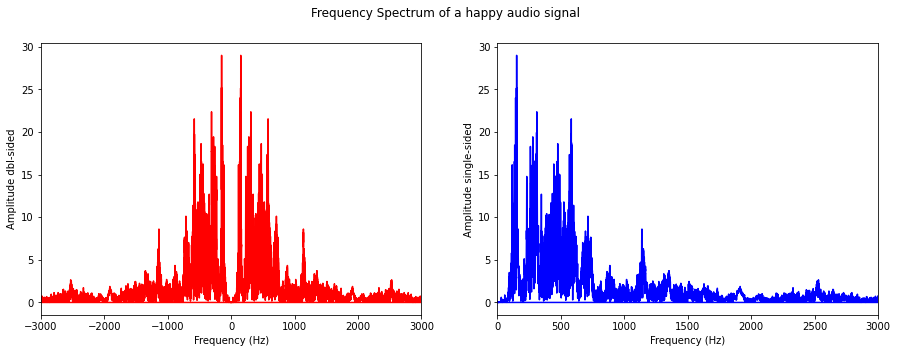

In [14]:
warnings.filterwarnings("ignore")

# Loading the calm audio file to display the frequency plot
signal,fs_rate = librosa.load(path_1+"01/"+list_1[0][0])

print ("Frequency sampling", fs_rate)
l_audio = len(signal.shape)
print ("Channels", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Complete Samplings N", N)
secs = N / float(fs_rate)
print ("Secs", secs)
Ts = 1.0/fs_rate # Sampling interval in time
print ("Timestep between samples Ts", Ts)


# Plotting the frequency spectrum - happy audio
t = scipy.arange(0, secs, Ts) # Time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(N//2)] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(N//2)] # one side frequency range
fft_freqs_side = np.array(freqs_side)

fig=plt.figure(figsize=(15, 5))
fig.suptitle("Frequency Spectrum of a calm audio signal")
ax1=fig.add_subplot(121)
ax1.plot(freqs, FFT, "r") # Plotting the complete fft spectrum
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude dbl-sided')
ax1.set_xlim([-3000, 3000])

ax2=fig.add_subplot(122)
ax2.plot(freqs_side, abs(FFT_side), "b") # Plotting the positive fft spectrum
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude single-sided')
ax2.set_xlim([0, 3000])
fig.show();

# Loading the happy audio file to display the frequency plot
signal, fs_rate = librosa.load(path_1+"01/"+list_1[0][3])

# Plotting the frequency spectrum - fear audio
t = scipy.arange(0, secs, Ts) # Time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(N//2)] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(N//2)] # one side frequency range
fft_freqs_side = np.array(freqs_side)

fig=plt.figure(figsize=(15, 5))
fig.suptitle("Frequency Spectrum of a happy audio signal")
ax1=fig.add_subplot(121)
ax1.plot(freqs, FFT, "r") # Plotting the complete fft spectrum
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude dbl-sided')
ax1.set_xlim([-3000, 3000])

ax2=fig.add_subplot(122)
ax2.plot(freqs_side, abs(FFT_side), "b") # Plotting the positive fft spectrum
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude single-sided')
ax2.set_xlim([0, 3000])
fig.show();

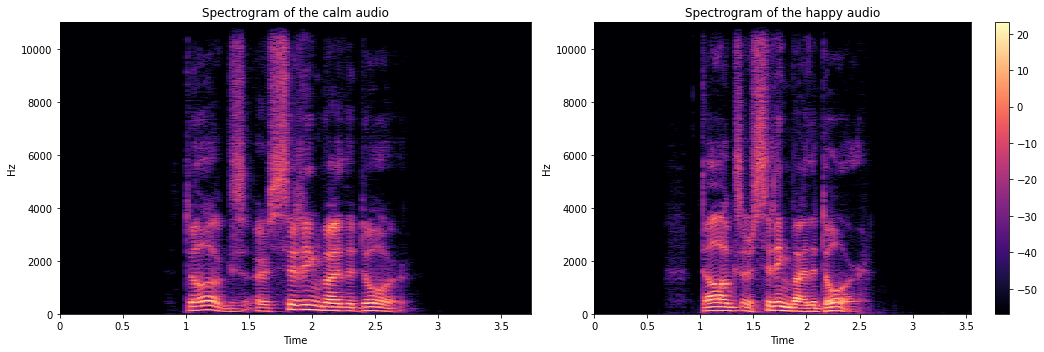

In [15]:
# Displaying the spectrogram of the happy audio signal
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(121)
img1=librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz',ax=ax1)
ax1.set_title("Spectrogram of the calm audio")


data,sampling_rate= librosa.load(path_1+"01/"+list_1[0][3])
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
ax2=fig.add_subplot(122)
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz',ax=ax2)
ax2.set_title("Spectrogram of the happy audio")
fig.colorbar(img1)
fig.tight_layout();

In [16]:
# Aggregating all the paths and file names
path_all=list(chain.from_iterable(path_full_1+path_full_2))
list_all=list(chain.from_iterable(list_1+list_2))

In [17]:
print(path_all[:5],path_all[-5:])
print(list_all[:5],list_all[-5:])

['/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-04-02-02-01-01.wav', '/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-04-01-01-01-01.wav', '/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-05-02-02-02-01.wav', '/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-03-01-02-01-01.wav', '/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-05-02-01-02-01.wav'] ['/content/drive/MyDrive/TherapyChatbot/SAVEE/AudioData/KL/su02.wav', '/content/drive/MyDrive/TherapyChatbot/SAVEE/AudioData/KL/n21.wav', '/content/drive/MyDrive/TherapyChatbot/SAVEE/AudioData/KL/n10.wav', '/content/drive/MyDrive/TherapyChatbot/SAVEE/AudioData/KL/n06.wav', '/content/drive/MyDrive/TherapyChatbot/SAVEE/AudioData/KL/su07.wav']
['03-01-04-02-02-01-01.wav', '03-01-04-01-01-01-01.wav', '03-01-05-02-02-02-01.wav', '03-01-03-01-02-01-01.wav'

In [18]:
import gc

In [19]:
# FUNCTION TO ADD WHITE NOISE
def noise_fn(y):
    noise_amp = 0.05*np.random.uniform()*np.amax(y)   
    y = y.astype('float64') + noise_amp * np.random.normal(size=y.shape[0])
    return y

# FUNCTION TO STRETCH THE SOUND
def stretch_fn(y, rate=0.8):
    data = librosa.effects.time_stretch(y, rate)
    return data

# FUNCTION TO INCREASE SPEED AND PITCH 
def speedNpitch(y):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.4  / length_change 
    tmp = np.interp(np.arange(0,len(y),speed_fac),np.arange(0,len(y)),y)
    minlen = min(y.shape[0], tmp.shape[0])
    y *= 0
    y[0:minlen] = tmp[0:minlen]
    return y

In [20]:
features=[]
feeling_list=[]
path_save='/content/drive/MyDrive/AI_3_Chatbot/data/'
for count,(item,path) in tqdm.notebook.tqdm(enumerate(zip(list_all,path_all))):
    if(count<940):
      continue
    flag=0
    if item[6:-16]=='02':
        feeling_list.append('calm')
        flag=1
    elif item[6:-16]=='01':
        feeling_list.append('neutral')
        flag=1
    elif item[6:-16]=='03':
        feeling_list.append('happy')
        flag=1
    elif item[6:-16]=='04':
        feeling_list.append('sad')
        flag=1
    elif item[6:-16]=='05':
        feeling_list.append('angry')
        flag=1
    elif item[6:-16]=='06':
        feeling_list.append('fearful')
        flag=1
    elif item[6:-16]=='07':
        feeling_list.append('disgust')
        flag=1
    elif item[6:-16]=='08':
        feeling_list.append('surprised')
        flag=1
    emotion=feeling_list[-1]
    
    
    path_dir='/content/drive/MyDrive/TherapyChatbot/sorted/data/{0}/'.format(emotion)
    try:
      os.makedirs(path_dir)
    except:
      pass
    if(flag==1):
        y, sr = librosa.load(path,sr=22050*2,offset=0.5,duration=4,res_type='kaiser_fast')
        yt,_=librosa.effects.trim(y)
        y=yt
        # Mel-Spectrogram
        path_save='/content/drive/MyDrive/TherapyChatbot/sorted/data/{0}/{1}_{2}.jpeg'.format(emotion,"Mel_spectrogram",str(count))
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(mel_spec)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)
        plt.close();

        # Noisy
        path_save='/content/drive/MyDrive/TherapyChatbot/sorted/data/{0}/{1}_{2}.jpeg'.format(emotion,"Noisy",str(count))
        noisy = noise_fn(y)
        mel_spec = librosa.feature.melspectrogram(y=noisy, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(mel_spec)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)
        plt.close();

        # Stretch
        path_save='/content/drive/MyDrive/TherapyChatbot/sorted/data/{0}/{1}_{2}.jpeg'.format(emotion,"Stretch",str(count))
        stretch= stretch_fn(y)
        mel_spec = librosa.feature.melspectrogram(y=stretch, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(mel_spec)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)
        plt.close();

        # Speed and Pitch
        path_save='/content/drive/MyDrive/TherapyChatbot/sorted/data/{0}/{1}_{2}.jpeg'.format(emotion,"SpeednPitch",str(count))
        speed_pitch= speedNpitch(y)
        mel_spec = librosa.feature.melspectrogram(y=speed_pitch, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(mel_spec)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)
        plt.close();
    gc.collect()

0it [00:00, ?it/s]

KeyboardInterrupt: ignored

In [21]:
angry = glob.glob('/content/drive/My Drive/TherapyChatbot/sorted/data/angry/*.*')
calm = glob.glob('/content/drive/My Drive/TherapyChatbot/sorted/data/calm/*.*')
disgust = glob.glob('/content/drive/My Drive/TherapyChatbot/sorted/data/disgust/*.*')
fearful = glob.glob('/content/drive/My Drive/TherapyChatbot/sorted/data/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/TherapyChatbot/sorted/data/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/TherapyChatbot/sorted/data/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/TherapyChatbot/sorted/data/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/TherapyChatbot/sorted/data/surprised/*.*')

In [22]:
data = []
labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Surprised')

In [ ]:
data = np.array(data)
labels = np.array(labels)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=22, stratify=labels)

In [ ]:
# Check shapes of training and testing sets
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (2590, 224, 224, 3), y_train has a shape of (2590,)
X_test has a shape of (1110, 224, 224, 3), y_test has a shape of (1110,)


In [ ]:
# Finally, we normalize pixels in X_train and X_test to the range [0,1] for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

### Fine-Tuning the VGG-16 model to detect emotion

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)


0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten True
20 dense True
21 dropout True
22 dense_1 True
23 dense_2 True


In [ ]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('ftzq.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
callback = EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
train_datagen = ImageDataGenerator(
                                    zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.15)
#                                   #  height_shift_range=0.4,
#                                   #  shear_range=0.3,
#                                   #  horizontal_flip=True, 
#                                   #  fill_mode='nearest')

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)


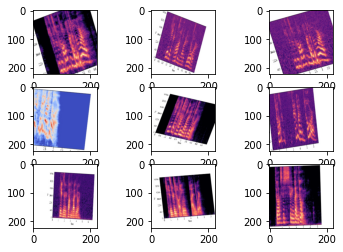

In [ ]:
img_rows, img_cols = 224, 224

for x, y in train_datagen.flow(X_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=10,
                    validation_data=(X_test,y_test),
                    # validation_steps=20,
                    epochs=5,
                    callbacks=[lr_reduce,checkpoint, callback])
                    # shuffle=True)
                    

NameError: ignored

In [ ]:
transfer_model.save_weights("/content/drive/My Drive/TherapyChatbot/models/emotion_model_weights.h5")
#transfer_model.save('/content/drive/MyDrive/TherapyChatbot/models/emotion_model.h5')
#print("Saved model to disk")

NameError: ignored

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()


In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plt.figure(figsize=(15, 5))
sns.heatmap(confusion_mtx, annot=True)
plt.xticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.yticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

In [ ]:
#Loading the model
transfer_model = load_model('/content/drive/MyDrive/AI_3_Chatbot/models/emotion_model.h5')
#transfer_model.load_weights('/content/drive/MyDrive/AI_3_Chatbot/models/emotion_model_weights.h5')

In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""


AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
def get_text_emo(count=0, ):
  audio, sample_rate = get_audio()
  # Saving the audio file
  path = f"/content/drive/MyDrive/AI_3_Chatbot/audio_rec/audio_{count}.wav"
  sf.write(path, audio, sample_rate)
  
  # Getting the Spectrogram of the audio
  y, sample_rate = librosa.load(path,sr=22050*2,offset=0.5,duration=4,res_type='kaiser_fast')
  yt,_=librosa.effects.trim(y)
  y=yt
  # Mel-Spectrogram
  path_save=f"/content/drive/MyDrive/AI_3_Chatbot/audio_rec/spectrogram_{count}.jpeg"
  mel_spec = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_mels=128,fmax=8000)
  db_spec = librosa.power_to_db(mel_spec)
  librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
  plt.savefig(path_save);
  plt.close();

  #Preparing the input to emotion model
  image = tf.keras.preprocessing.image.load_img(path_save, color_mode='rgb', target_size= (224,224))
  image = np.array(image)
  image = np.expand_dims(image, axis=0)
  pred = transfer_model(image)
  scores=pred
  dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
  index = np.argmax(pred,axis=1) 
  emotion = dict_characters[index[0]]

  # Getting the text from the audio
  audio_path = sr.AudioFile(f'/content/drive/MyDrive/AI_3_Chatbot/audio_rec/audio_{count}.wav')
  r = sr.Recognizer()
  with audio_path as source:
    audio_load = r.record(source)
  text = r.recognize_google(audio_load)
  return text, emotion, scores

In [ ]:
# Sample output from the emotion detector
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
text, emotion,scores=get_text_emo()
print("Detected Text :", text)
print("Predicted Emotion:",emotion)
print("Classwise Scores")
for count,i in enumerate(np.array(scores)[0]):
  print("Class ",dict_characters[count]," has a score of ", np.round(i,2))